#### 描述性统计

数据规模、最大值、最小值、平均值、标准差、时间分布

In [1]:
import logging
import pandas as pd
import matplotlib.gridspec as gridspec
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

class Logger(object):

    def __init__(self, filename, level='info'):
        level = logging.INFO if level == 'info' else logging.DEBUG
        self.logger = logging.getLogger(filename)
        self.logger.propagate = False
        self.logger.setLevel(level)  # 

        th = logging.FileHandler(filename, 'a')

        self.logger.addHandler(th)  # 

In [4]:
path = "base_data/overview"
files = os.listdir(path)
log = Logger("log/describe_file.txt")

for file in files:
    df = pd.read_csv(os.path.join(path, file))
    df_stats = df['Novelty'].describe()
    log.logger.info(file)
    log.logger.info(df_stats)

##### Gold Dataset

##### Draw

整体分布情况

In [3]:
df_uzzi = pd.read_csv("base_data/overview/uzzi_sec_merge_comb_filtered.csv")
u_values = df_uzzi['Novelty'].tolist()
df_uzzi_merge_sec = pd.read_csv("base_data/overview/uzzi_sec_merge_sec_filtered.csv")
u_sec_values = df_uzzi_merge_sec['Novelty'].tolist()
df_wang = pd.read_csv("base_data/overview/wang_sec_filtered.csv")
w_values = df_wang['Novelty'].tolist()

# fig, axs = plt.subplots(1,3,figsize=(12,6))
# axs[0].hist(u_values, bins=50, color='#5e78c2', edgecolor='black', alpha=0.7)
# axs[0].set_xlabel("U-merge")
# axs[0].set_ylabel("Frequency")

# axs[1].hist(u_sec_values, bins=50, color='#b97ac6', edgecolor='black', alpha=0.7)
# axs[1].set_xlabel("U-mean")
# # axs[1].set_ylabel("Frequency")

# axs[2].hist(w_values, bins=50, color='#fd80af', edgecolor='black', alpha=0.7)
# axs[2].set_xlabel("W")
# # axs[2].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()

In [ ]:
plt.hist(u_values, bins=50, color='#5e78c2', edgecolor='black', alpha=0.7)
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.hist(u_sec_values, bins=50, color='#b97ac6', edgecolor='black', alpha=0.7)
plt.show()

In [ ]:
plt.hist(w_values, bins=50, color='#fd80af', edgecolor='black', alpha=0.7)
plt.show()

各年份分布情况

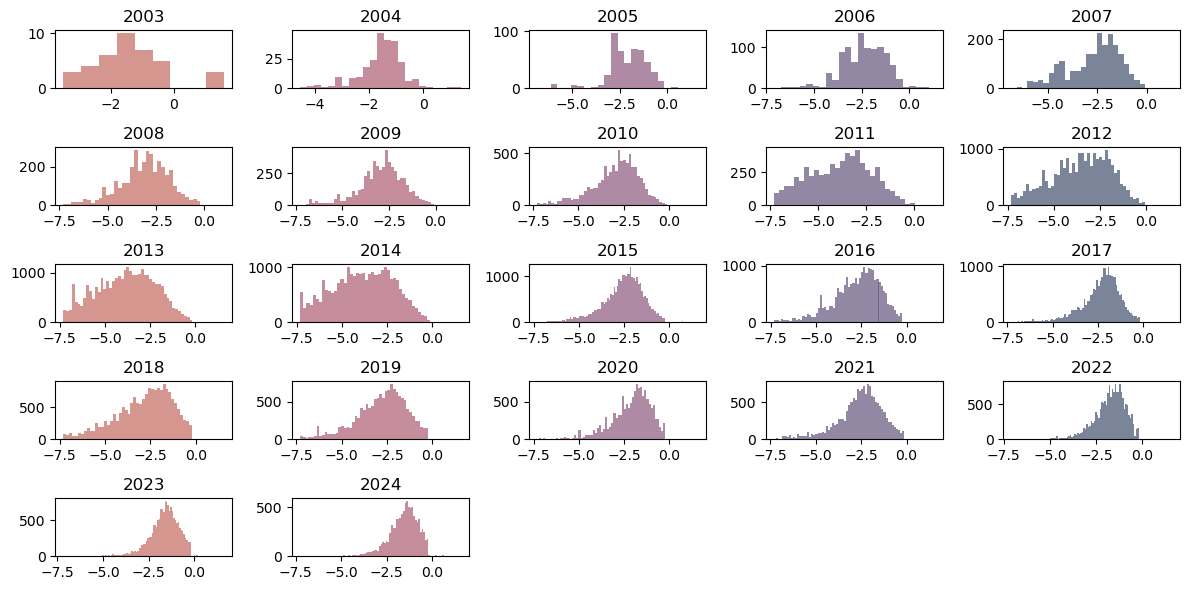

In [ ]:
# for uzzi-sec 2003~ 2024 22个
fig, axs = plt.subplots(5,5,figsize=(12,6))
axs = axs.flatten()

# 配色方案： https://mycolor.space/
color_list = ["#c26a5e","#ad5d72","#8c597e","#65567c","#43516e"]

# 按年份分组
df = pd.read_csv("base_data/overview/uzzi_sec_merge_comb_filtered.csv")
df_grouped = df.groupby('Year')

for idx, (year, group) in enumerate(df_grouped):
    novel_values = group['Novelty'].tolist()
    axs[idx].hist(novel_values, bins='auto', color=color_list[idx%5], alpha=0.7)
    axs[idx].set_title(year)

for idx in range(22, 25):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()

In [ ]:
# for uzzi-sec 2006~ 2021 16个
fig, axs = plt.subplots(4,4,figsize=(12,6))
axs = axs.flatten()

# 配色方案： https://mycolor.space/
color_list = ["#c26a5e","#ad5d72","#8c597e","#65567c"]

# 按年份分组
df = pd.read_csv("base_data/overview/wang_sec_filtered.csv")
df_grouped = df.groupby('Year')

for idx, (year, group) in enumerate(df_grouped):
    novel_values = group['Novelty'].tolist()
    axs[idx].hist(novel_values, bins='auto', color=color_list[idx%4], alpha=0.7)
    axs[idx].set_title(year)

plt.tight_layout()
plt.show()

各学科分布情况

In [14]:
subjects = {
    'pbio': 'Biology',
    'pcbi': 'Computational Biology',
    'pgen': 'Genetics',
    'pgph': 'Global Public Health',
    'pmed': 'Medicine',
    'pntd': 'Neglected Tropical Diseases',
    'pone': 'PLOS One',
    'ppat': 'Pathogens',
    'pstr': 'Sustainability and Transformation',
    'pwat': 'Water'
}

In [ ]:
# 按学科分组
df = pd.read_csv("base_data/overview/uzzi_sec_merge_comb_filtered.csv")
dois = df['Doi'].tolist()
subjs = []
for doi in dois:
    pos = doi.find("p")
    subj = doi[pos:pos+4]
    subjs.append(subj)

df['Subject'] = subjs
df_grouped = df.groupby('Subject')

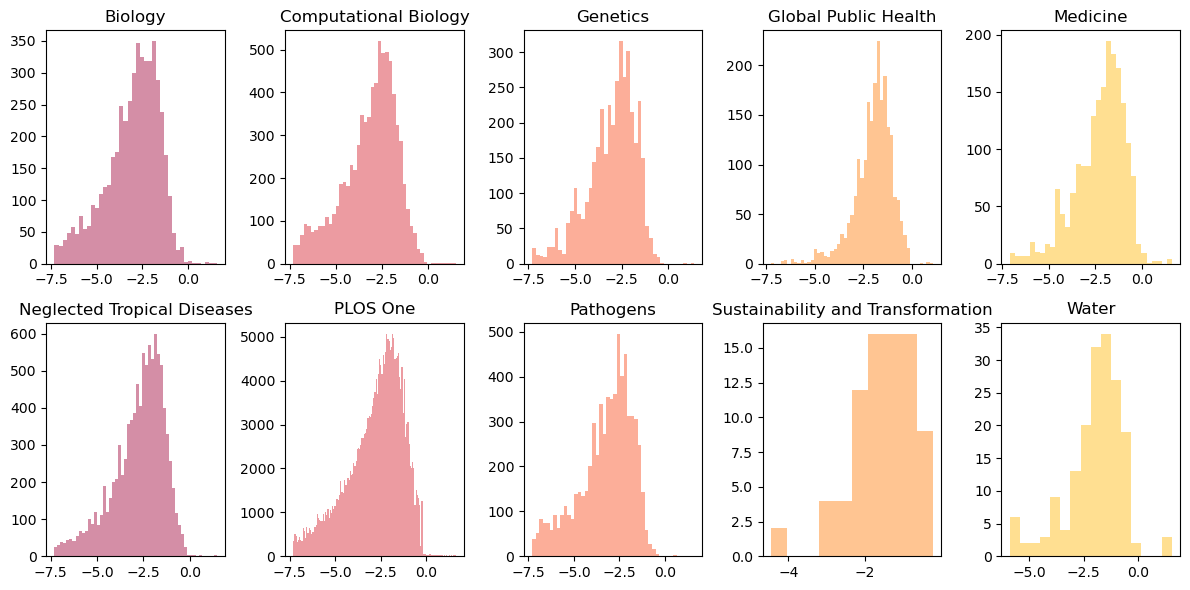

In [15]:
fig, axs = plt.subplots(2,5,figsize=(12,6))
axs = axs.flatten()

# 配色方案： https://mycolor.space/
color_list = ["#c25e81","#e47179","#fc8c6e","#ffad64","#ffd262"]

for idx, (subj, group) in enumerate(df_grouped):
    novel_values = group['Novelty'].tolist()
    axs[idx].hist(novel_values, bins='auto', color=color_list[idx%5], alpha=0.7)
    axs[idx].set_title(subjects[subj])

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("base_data/overview/wang_sec_filtered.csv")
dois = df['Doi'].tolist()
subjs = []
for doi in dois:
    pos = doi.find("p")
    subj = doi[pos:pos+4]
    subjs.append(subj)

df['Subject'] = subjs
df_grouped = df.groupby('Subject')

fig, axs = plt.subplots(2,4,figsize=(12,6))
axs = axs.flatten()

# 配色方案： https://mycolor.space/
color_list = ["#c25e81","#e47179","#fc8c6e","#ffad64","#ffd262"]

for idx, (subj, group) in enumerate(df_grouped):
    novel_values = group['Novelty'].tolist()
    axs[idx].hist(novel_values, bins='auto', color=color_list[idx%5], alpha=0.7)
    axs[idx].set_title(subjects[subj])

plt.tight_layout()
plt.show()

##### 异常值

In [ ]:
df_uzzi = pd.read_csv("base_data/overview/uzzi_sec_merge_comb.csv")
u_values = df_uzzi['Novelty'].tolist()

plt.figure(figsize=(12,6))
sns.ecdfplot(u_values, label='ECDF', lw=2)
plt.grid()
plt.show()

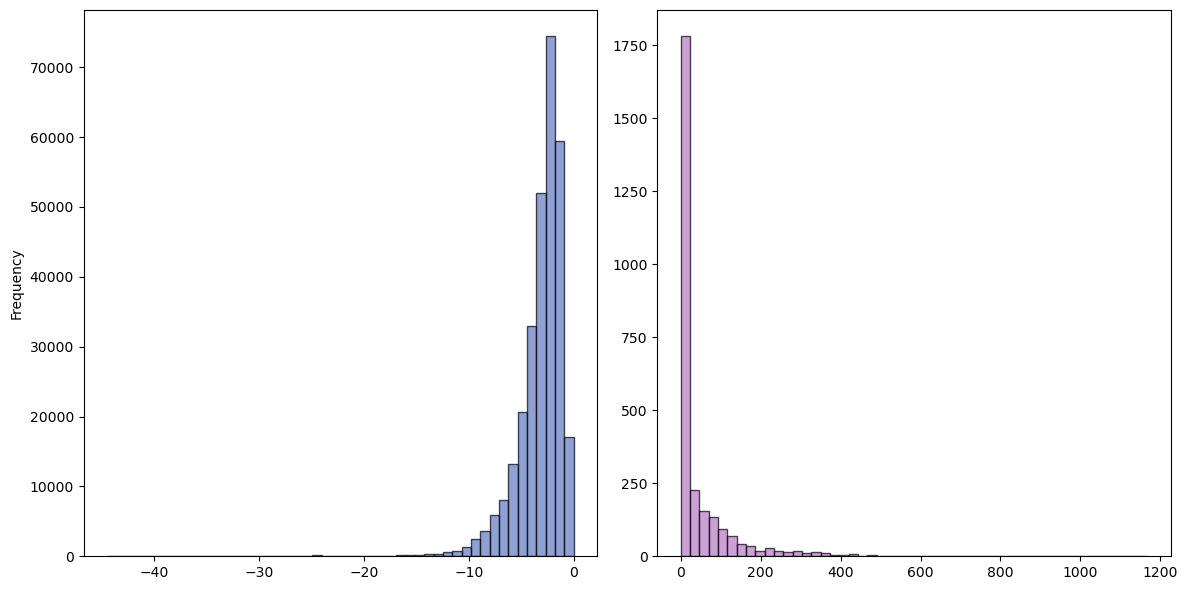

In [7]:
df_uzzi = pd.read_csv("base_data/overview/uzzi_sec_merge_comb.csv")
u_values = df_uzzi['Novelty'].tolist()

u_values_small = [x for x in u_values if x < 0]
u_values_large = [x for x in u_values if x > 0]

fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].hist(u_values_small, bins=50, color='#5e78c2', edgecolor='black', alpha=0.7)
axs[0].set_ylabel("Frequency")

axs[1].hist(u_values_large, bins=50, color='#b97ac6', edgecolor='black', alpha=0.7)

plt.tight_layout()
plt.show()

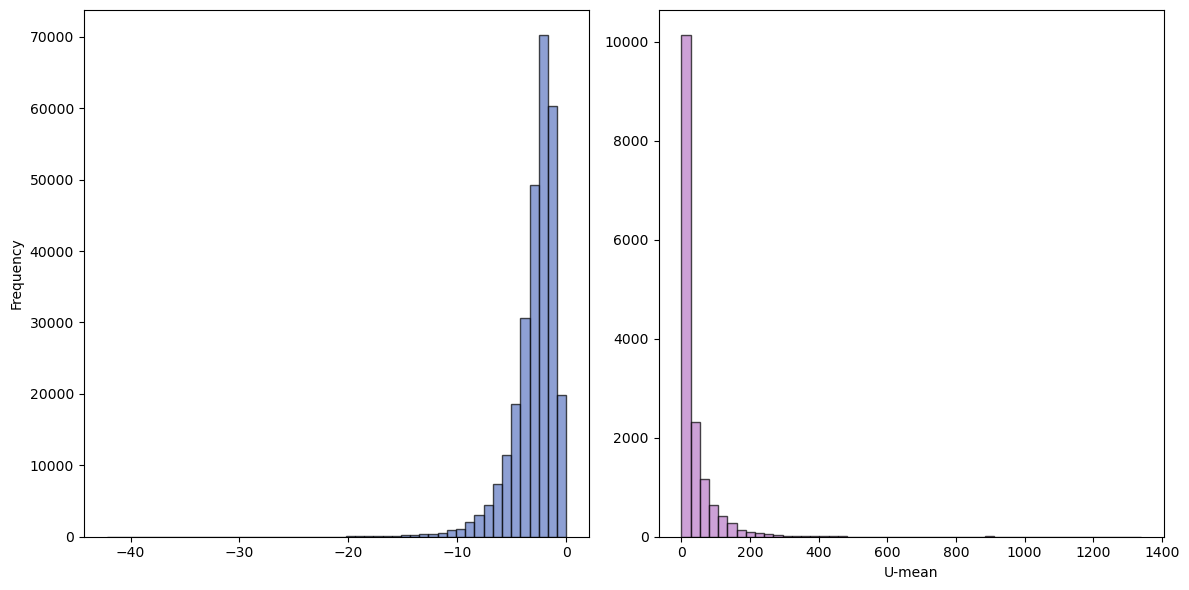

In [6]:
df_uzzi = pd.read_csv("base_data/overview/uzzi_sec_merge_sec.csv")
u_values = df_uzzi['Novelty'].tolist()

u_values_small = [x for x in u_values if x < 0]
u_values_large = [x for x in u_values if x > 0]

fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].hist(u_values_small, bins=50, color='#5e78c2', edgecolor='black', alpha=0.7)
# axs[0].set_xlabel("")
axs[0].set_ylabel("Frequency")

axs[1].hist(u_values_large, bins=50, color='#b97ac6', edgecolor='black', alpha=0.7)
axs[1].set_xlabel("U-mean")
# axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()